# MLB Attendance Quick-Study

###### Author: Jake Singleton

## Motivation

On May 30, 2019, ESPN reported [here](http://www.espn.com/mlb/story/_/id/26857513/mlb-attendance-4th-straight-year) that MLB attendance was down for the 4th straight season. That is, since 2016, average MLB attendance has continued to fall. And while the article cites several critical and extreme examples, the goal of this notebook is to examine attendance trends for all 30 MLB teams--especially in a visual way.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import HTML
%matplotlib inline

In [2]:
plotly.tools.set_credentials_file(username='jake_singleton', api_key='Aox4VWeOs0dzGrIMuFXT')

In [3]:
# data
att2016 = pd.read_csv('./att2016.csv')
att2017 = pd.read_csv('./att2017.csv')
att2018 = pd.read_csv('./att2018.csv')
att2019 = pd.read_csv('./att2019.csv')

# create year columns
att2016['year'] = 2016
att2017['year'] = 2017
att2018['year'] = 2018
att2019['year'] = 2019

# merge to 1 df
allatt = pd.concat([att2016, att2017, att2018, att2019], axis=0)

In [4]:
# check new data frame looks correct
allatt.iloc[27:32]

,Tm,Attendance,Attend/G,BatAge,PAge,BPF,PPF,#HOF,#A-S,#a-tA-S,Est. Payroll,Time,Chall,Succ,Succ%,Managers,year
27,TEX,"2,710,402","33,462",28.4,28.8,107,108,0,2,12,"$212,117,760",3:00,51,23,45%,Banister,2016
28,TOR,"3,392,099","41,878",30.1,29.8,102,101,0,5,16,"$182,690,767",3:00,49,19,38%,Gibbons,2016
29,WSN,"2,481,938","30,641",28.8,29.1,103,102,0,5,12,"$152,967,400",3:08,47,19,40%,Baker,2016
0,ARI,"2,134,375","26,350",28.3,28.7,108,108,0,4,9,"$106,580,200",3:09,32,16,50%,Lovullo,2017
1,ATL,"2,505,252","30,929",28.6,29.4,100,100,0,1,12,"$119,705,250",3:04,47,19,40%,Snitker,2017


In [5]:
# Column cleaning
allatt['Attend/G'] = allatt['Attend/G'].str.replace(',', '', regex=False)
allatt['Attend/G'] = pd.to_numeric(allatt['Attend/G'])
allatt['Tm'] = allatt['Tm'].astype(str)

In [6]:
# Modify data frame for easy plotting with cufflinks
clean_frame = pd.DataFrame()

for team_name in allatt['Tm'].unique():
    att_cols = []
    for yr in allatt['year'].unique():
        attnum = int(allatt.loc[(allatt['Tm'] == team_name) & (allatt['year'] == yr)]['Attend/G'])
        att_cols.append(attnum)
    dat = pd.DataFrame({team_name: att_cols})
    clean_frame = pd.concat([clean_frame, dat], axis=1)
    
clean_frame.index = [2016, 2017, 2018, 2019]

display(clean_frame)

,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,...,PHI,PIT,SDP,SEA,SFG,STL,TBR,TEX,TOR,WSN
2016,25138,24950,26819,36487,39906,21559,23384,19650,32130,31173,...,23644,27768,29030,27999,41546,42525,15879,33462,41878,30641
2017,26350,30929,25042,36021,39501,20117,22678,25286,36465,28662,...,23523,23697,26401,26364,40786,42572,15477,30960,39554,31173
2018,27688,31553,19311,35748,38794,19862,20116,23786,37233,22926,...,26644,18316,26772,28389,38965,42020,14259,26014,28707,31230
2019,26303,30686,15678,34397,36576,18181,19412,17031,33023,16663,...,35396,17555,28906,22680,32401,42192,13775,27450,20744,27628


In [7]:
clean_frame.columns

Index(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET',
       'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK',
       'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='object')

In [8]:
# Divide into divisions to avoid over-plotting

NLWest = clean_frame.loc[:, ['ARI', 'COL', 'SDP', 'LAD', 'SFG']]
NLCen = clean_frame.loc[:, ['CHC', 'CIN', 'MIL', 'PIT', 'STL']]
NLEast = clean_frame.loc[:, ['ATL', 'NYM', 'PHI', 'WSN', 'MIA']]

ALWest = clean_frame.loc[:, ['HOU', 'LAA', 'OAK', 'TEX', 'SEA']]
ALCen = clean_frame.loc[:, ['CHW', 'CLE', 'DET', 'KCR', 'MIN']]
ALEast = clean_frame.loc[:, ['BAL', 'BOS', 'NYY', 'TBR', 'TOR']]

In [9]:
NLEast.head()

,ATL,NYM,PHI,WSN,MIA
2016,24950,34440,23644,30641,21405
2017,30929,30378,23523,31173,20295
2018,31553,27469,26644,31230,10014
2019,30686,28459,35396,27628,9479


In [10]:
# Plotting each division
ARItrace = go.Bar(
            x=NLWest.index,
            y=NLWest['ARI'],
            name='ARI',
            marker=dict(color='#d62728')
)

COLtrace = go.Bar(
            x=NLWest.index,
            y=NLWest['COL'],
            name='COL',
            marker=dict(color='#9467bd')
)

SDPtrace = go.Bar(
            x=NLWest.index,
            y=NLWest['SDP'],
            name='SDP',
            marker=dict(color='#8c564b')
)

LADtrace = go.Bar(
            x=NLWest.index,
            y=NLWest['LAD'],
            name='LAD',
            marker=dict(color='darkblue')
)

SFGtrace = go.Bar(
            x=NLWest.index,
            y=NLWest['SFG'],
            name='SFG',
            marker=dict(color='#ff7f0e')
)

data = [ARItrace, COLtrace, SDPtrace, LADtrace, SFGtrace]

layout = go.Layout(
    barmode='group',
    title = 'NL West: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [11]:
CHCtrace = go.Bar(
            x=NLCen.index,
            y=NLCen['CHC'],
            name='CHC',
            marker=dict(color='#1f77b4')
)

CINtrace = go.Bar(
            x=NLCen.index,
            y=NLCen['CIN'],
            name='CIN',
            marker=dict(color='gray')
)

MILtrace = go.Bar(
            x=NLCen.index,
            y=NLCen['MIL'],
            name='MIL',
            marker=dict(color='goldenrod')
)

PITtrace = go.Bar(
            x=NLCen.index,
            y=NLCen['PIT'],
            name='PIT',
            marker=dict(color='yellow')
)

STLtrace = go.Bar(
            x=NLCen.index,
            y=NLCen['STL'],
            name='STL',
            marker=dict(color='red')
)

data = [CHCtrace, CINtrace, MILtrace, PITtrace, STLtrace]

layout = go.Layout(
    barmode='group',
    title = 'NL Central: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [12]:
ATLtrace = go.Bar(
            x=NLEast.index,
            y=NLEast['ATL'],
            name='ATL',
            marker=dict(color='darkblue')
)

NYMtrace = go.Bar(
            x=NLEast.index,
            y=NLEast['NYM'],
            name='NYM',
            marker=dict(color='#ff7f0e')
)

PHItrace = go.Bar(
            x=NLEast.index,
            y=NLEast['PHI'],
            name='PHI',
            marker=dict(color='#d62728')
)

WSNtrace = go.Bar(
            x=NLEast.index,
            y=NLEast['WSN'],
            name='WSN',
            marker=dict(color='indianred')
)

MIAtrace = go.Bar(
            x=NLEast.index,
            y=NLEast['MIA'],
            name='MIA',
            marker=dict(color='mediumaquamarine')
)

data = [ATLtrace, NYMtrace, PHItrace, WSNtrace, MIAtrace]

layout = go.Layout(
    barmode='group',
    title = 'NL East: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [13]:
HOUtrace = go.Bar(
            x=ALWest.index,
            y=ALWest['HOU'],
            name='HOU',
            marker=dict(color='#ff7f0e')
)

LAAtrace = go.Bar(
            x=ALWest.index,
            y=ALWest['LAA'],
            name='LAA',
            marker=dict(color='#d62728')
)

OAKtrace = go.Bar(
            x=ALWest.index,
            y=ALWest['OAK'],
            name='OAK',
            marker=dict(color='#2ca02c')
)

TEXtrace = go.Bar(
            x=ALWest.index,
            y=ALWest['TEX'],
            name='TEX',
            marker=dict(color='#1f77b4')
)

SEAtrace = go.Bar(
            x=ALWest.index,
            y=ALWest['SEA'],
            name='SEA',
            marker=dict(color='mediumaquamarine')
)

data = [HOUtrace, LAAtrace, OAKtrace, TEXtrace, SEAtrace]

layout = go.Layout(
    barmode='group',
    title = 'AL West: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [14]:
CHWtrace = go.Bar(
            x=ALCen.index,
            y=ALCen['CHW'],
            name='CHW',
            marker=dict(color='#7f7f7f')
)

CLEtrace = go.Bar(
            x=ALCen.index,
            y=ALCen['CLE'],
            name='CLE',
            marker=dict(color='indianred')
)

DETtrace = go.Bar(
            x=ALCen.index,
            y=ALCen['DET'],
            name='DET',
            marker=dict(color='darkblue')
)

KCRtrace = go.Bar(
            x=ALCen.index,
            y=ALCen['KCR'],
            name='KCR',
            marker=dict(color='royalblue')
)

MINtrace = go.Bar(
            x=ALCen.index,
            y=ALCen['MIN'],
            name='MIN',
            marker=dict(color='firebrick')
)

data = [CHWtrace, CLEtrace, DETtrace, KCRtrace, MINtrace]

layout = go.Layout(
    barmode='group',
    title = 'AL Central: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [15]:
BALtrace = go.Bar(
            x=ALEast.index,
            y=ALEast['BAL'],
            name='BAL',
            marker=dict(color='#ff7f0e')
)

BOStrace = go.Bar(
            x=ALEast.index,
            y=ALEast['BOS'],
            name='BOS',
            marker=dict(color='#d62728')
)

TBRtrace = go.Bar(
            x=ALEast.index,
            y=ALEast['TBR'],
            name='TBR',
            marker=dict(color='mediumaquamarine')
)

NYYtrace = go.Bar(
            x=ALEast.index,
            y=ALEast['NYY'],
            name='NYY',
            marker=dict(color='navy')
)

TORtrace = go.Bar(
            x=ALEast.index,
            y=ALEast['TOR'],
            name='TOR',
            marker=dict(color='blue')
)

data = [BALtrace, BOStrace, NYYtrace, TORtrace, TBRtrace]

layout = go.Layout(
    barmode='group',
    title = 'AL East: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

One important thing to keep in mind is that when looking at the plots, it's more important to look at the rising and falling of the bars for each team rather than the raw number itself. This is because stadium capacity varies significantly. Unfortunately, there wasn't percent attendance in the data, so this will do. (If I come back to this study, I may address this issue, but this will do for now).

### Analysis
None of the plots look particularly promising for MLB attendance, especially the AL Central (yikes). We see some examples of teams showing increases (e.g. Milwaukee recently due to their success), but also some teams historically known for good attendance (San Francisco) declining probably due to lack of recent success. The Florida teams, Tampa and Miami, have been bad recently. The Trop needs to go, and this is reflected throughout the above plot for Tampa. However, as for Miami, while their attendance wasn't good in 2016, it has considerably dropped since 2018, the year Derek Jeter's group took over the team and traded their superstars. 

As for a silver lining, fortunately the typically good teams (LAD, NYY, BOS, CHC, STL) have remained relatively steady in their posting of good attendance numbers. Philadelphia is also a team we see making a big jump just this year, surely due in large part to their signings of Bryce Harper, JT Realmuto, Jean Segura, and more.

In [16]:
# Analyze overall MLB attendance
yearly = pd.read_csv('./attyearly.csv')
yearly.head()

,Year,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G
0,2019,30,881,3:06,3:03,71.0,8.06,9.41,76.4,3.92,10.2,4.27,1.07,0.12,18.3,21.1,"23,627,816","26,819"
1,2018,30,2431,3:04,3:00,216.0,8.89,8.90,76.1,3.90,10.4,4.36,1.16,0.16,24.7,29.7,"69,671,272","28,659"
2,2017,30,2430,3:08,3:05,182.0,7.49,9.29,76.2,3.89,10.3,4.22,1.13,0.15,24.2,28.0,"72,678,797","29,908"
3,2016,30,2428,3:04,3:00,185.0,7.62,8.96,76.0,3.88,10.4,4.15,1.12,0.16,24.2,27.5,"73,159,044","30,131"
4,2015,30,2429,3:00,2:56,212.0,8.73,8.50,75.6,3.83,10.4,4.11,1.16,0.18,24.5,27.0,"73,719,340","30,349"


In [17]:
yearly = yearly[yearly['Year'] >= 2016]

In [18]:
data = [go.Bar(
            x=yearly['Year'],
            y=yearly['Attend/G']
)]


layout = go.Layout(
    title = 'MLB: Average Attendance per Game',
    yaxis = dict(title='Attendance/G'),
    xaxis = dict(title='Season'),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(data, filename='basic-bar')


Obvious decline, as was noted in the article.

In [19]:
# We know attendance has dropped since 2016... but how much? 
# What if we plot the change in attendance/g between 2016 and 2019 for every team?

att2019.columns = ['Tm1', 'Attendance', 'Attend/G19', 'BatAge', 'PAge', 'BPF', 'PPF', '#HOF',
       '#A-S', '#a-tA-S', 'Est. Payroll', 'Time', 'Chall', 'Succ', 'Succ%',
       'Managers', 'year19'] 
diff_16_19 = pd.concat([att2016, att2019], axis=1)
diff_16_19.head()

,Tm,Attendance,Attend/G,BatAge,PAge,BPF,PPF,#HOF,#A-S,#a-tA-S,...,#HOF,#A-S,#a-tA-S,Est. Payroll,Time,Chall,Succ,Succ%,Managers,year19
0,ARI,"2,036,216","25,138",26.7,26.4,107,107,0,1,12,...,0,0,6,"$124,016,266",3:17,13,8,61%,Lovullo,2019
1,ATL,"2,020,914","24,950",28.9,26.4,98,99,0,1,12,...,0,0,10,"$119,036,667",3:10,12,7,58%,Snitker,2019
2,BAL,"2,172,344","26,819",28.5,27.9,102,102,0,5,16,...,0,0,1,"$82,696,100",3:06,11,5,45%,Hyde,2019
3,BOS,"2,955,434","36,487",28.5,29.0,106,106,0,6,16,...,0,0,10,"$218,978,142",3:15,13,7,53%,Cora,2019
4,CHC,"3,232,420","39,906",27.4,29.9,101,100,0,7,16,...,0,0,13,"$207,805,215",3:15,9,3,33%,Maddon,2019


In [20]:
diff_16_19['Attend/G'] = diff_16_19['Attend/G'].str.replace(',', '', regex=False)
diff_16_19['Attend/G19'] = diff_16_19['Attend/G19'].str.replace(',', '', regex=False)

diff_16_19['Attend/G'] = pd.to_numeric(diff_16_19['Attend/G'])
diff_16_19['Attend/G19'] = pd.to_numeric(diff_16_19['Attend/G19'])

diff_16_19['diff'] = diff_16_19['Attend/G19'] - diff_16_19['Attend/G']

In [21]:
diff_16_19 = diff_16_19.loc[:, ['Tm', 'Attend/G', 'Attend/G19', 'year', 'year19', 'diff']]
diff_16_19.head()

,Tm,Attend/G,Attend/G19,year,year19,diff
0,ARI,25138,26303,2016,2019,1165
1,ATL,24950,30686,2016,2019,5736
2,BAL,26819,15678,2016,2019,-11141
3,BOS,36487,34397,2016,2019,-2090
4,CHC,39906,36576,2016,2019,-3330


In [22]:
DIFFtrace = {
    'x': diff_16_19['Tm'],
    'y': diff_16_19['diff'],
    'type': 'bar'
};
 
data = [DIFFtrace]

layout = {
  'xaxis': {'title': 'Team'},
  'yaxis': {'title': 'Change in Attendance from 2016'},
  'barmode': 'relative',
  'title': 'Difference of 2019 Attendance/G and 2016 Attend/G'
}

py.iplot({'data': data, 'layout': layout}, filename='barmode-relative')

21/30 teams have seen their attendance go down. BAL, DET, KCR, MIA, and TOR are 5 very obvious ones, and are most likely strugginling due to lack of success, among other things (smaller market, perhaps cold weather, lack of progess in the front office, etc.) Among risers, we see that ATL, HOU, MIL, and PHI stand out. ATL has new good youth and a new stadium, HOU has been great, MIL is contending, and PHI has just made a major splash in free agency. It's interesting to see some of the more famous teams, like BOS and CHC decreasing, especially when they play in smaller stadiums. However, it is true there are doubts about the Cubs' future, and the Red Sox have just started badly, so as for them there may not be too much to worry about. LAD and NYY, two other big market, famous teams, have seen slight increases, which is positive.

## Quick and Dirty Stats + Intuition Check

In [23]:
# Correlation between 2019 MLB Win% and Attendance/G
standings = pd.read_csv('./standings2018.csv')
standings.head()

,Rk,Tm,Lg,G,W,L,W-L Percent,R,RA,Rdiff,...,Luck,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,_.500,<.500
0,1.0,BOS,AL,162.0,108,54,0.667,5.4,4.0,1.4,...,5.0,16-4,57-24,51-30,5-Aug,25-14,87-38,21-16,41-33,67-21
1,2.0,HOU,AL,162.0,103,59,0.636,4.9,3.3,1.6,...,-6.0,13-7,46-35,57-24,6-May,24-24,66-36,37-23,41-38,62-21
2,3.0,NYY,AL,162.0,100,62,0.617,5.3,4.1,1.1,...,1.0,9-Nov,53-28,47-34,5-Sep,23-17,70-47,30-15,41-30,59-32
3,4.0,OAK,AL,162.0,97,65,0.599,5.0,4.2,0.9,...,2.0,8-Dec,50-31,47-34,13-6,31-14,65-40,32-25,33-40,64-25
4,5.0,MIL,NL,163.0,96,67,0.589,4.6,4.0,0.6,...,5.0,13-7,51-30,45-37,7-Sep,33-19,72-48,24-19,49-46,47-21


In [24]:
winsatt_merged = pd.merge(standings, att2018, how='inner', on='Tm').loc[:, :'Attend/G']
winsatt_merged.head()

,Rk,Tm,Lg,G,W,L,W-L Percent,R,RA,Rdiff,...,Home,Road,ExInn,1Run,vRHP,vLHP,_.500,<.500,Attendance,Attend/G
0,1.0,BOS,AL,162.0,108,54,0.667,5.4,4.0,1.4,...,57-24,51-30,5-Aug,25-14,87-38,21-16,41-33,67-21,"2,895,575","35,748"
1,2.0,HOU,AL,162.0,103,59,0.636,4.9,3.3,1.6,...,46-35,57-24,6-May,24-24,66-36,37-23,41-38,62-21,"2,980,549","36,797"
2,3.0,NYY,AL,162.0,100,62,0.617,5.3,4.1,1.1,...,53-28,47-34,5-Sep,23-17,70-47,30-15,41-30,59-32,"3,482,855","42,998"
3,4.0,OAK,AL,162.0,97,65,0.599,5.0,4.2,0.9,...,50-31,47-34,13-6,31-14,65-40,32-25,33-40,64-25,"1,573,616","19,427"
4,5.0,MIL,NL,163.0,96,67,0.589,4.6,4.0,0.6,...,51-30,45-37,7-Sep,33-19,72-48,24-19,49-46,47-21,"2,850,875","35,196"


In [25]:
winsatt_merged['Attend/G'] = winsatt_merged['Attend/G'].str.replace(',', '', regex=False)
winsatt_merged['Attend/G'] = pd.to_numeric(winsatt_merged['Attend/G'])

/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



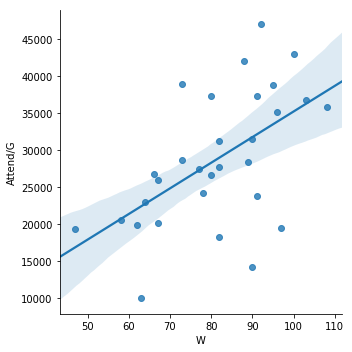

In [26]:
sns.lmplot(x='W', y='Attend/G', data=winsatt_merged, fit_reg=True);

In [27]:
winsatt_merged['W'].corr(winsatt_merged['Attend/G'])

0.5595920634191225

Now, let's compare this to 2007, when MLB's average attendance peaked (cited in the ESPN article).

In [28]:
att2007 = pd.read_csv('./att2007.csv')
standings2007 = pd.read_csv('./standings2007.csv')
winsatt_merged2007 = pd.merge(standings2007, att2007, how='inner', on='Tm').loc[:, :'Attend/G']
winsatt_merged2007.head()

,Rk,Tm,Lg,G,W,L,W-L Percent,R,RA,Rdiff,...,Home,Road,ExInn,1Run,vRHP,vLHP,_.500,<.500,Attendance,Attend/G
0,1.0,BOS,AL,162.0,96,66,0.593,5.4,4.1,1.3,...,51-30,45-36,5-Feb,22-28,71-43,25-23,44-40,52-26,"2,970,755","36,676"
1,2.0,CLE,AL,162.0,96,66,0.593,5.0,4.3,0.7,...,51-29,45-37,8-Nov,29-24,64-47,32-19,30-30,66-36,"2,275,912","28,449"
2,3.0,LAA,AL,162.0,94,68,0.580,5.1,4.5,0.6,...,54-27,40-41,3-Jul,25-19,75-47,19-21,41-28,53-40,"3,365,632","41,551"
3,4.0,NYY,AL,162.0,94,68,0.580,6.0,4.8,1.2,...,52-29,42-39,9-Apr,18-21,74-49,20-19,44-37,50-31,"4,271,083","52,729"
4,5.0,ARI,NL,162.0,90,72,0.556,4.4,4.5,-0.1,...,50-31,40-41,6-Aug,32-20,62-55,28-17,45-47,45-25,"2,325,249","28,707"


In [29]:
winsatt_merged2007['Attend/G'] = winsatt_merged2007['Attend/G'].str.replace(',', '', regex=False)
winsatt_merged2007['Attend/G'] = pd.to_numeric(winsatt_merged2007['Attend/G'])

/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



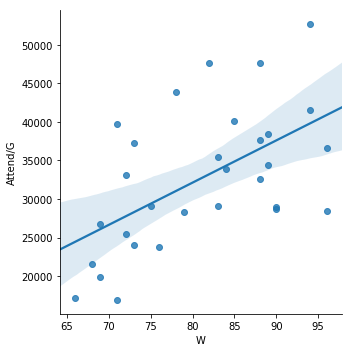

In [30]:
sns.lmplot(x='W', y='Attend/G', data=winsatt_merged2007, fit_reg=True);

In [31]:
winsatt_merged2007['W'].corr(winsatt_merged2007['Attend/G'])

0.562426433256421

We don't really see any change in the correlations between team wins and attendance per game for 2007 and 2018. This seems a bit surprising to me--I thought that the correlation between 2007 Ws and attend/g might be lower than that of 2018. Why? Because in 2007, perhaps there were fewer entertainment options in 2007, meaning an average person might be more likely to use baseball to pass time, regardless of the team's success. Additionally, 2007 occurred just before the recession, and so perhaps the average person was slightly more liberal with their money. 

One flaw in this analysis might be the use of attend/g rather than percent attendance. A successful team with a small stadium that consistently sells out, ideally, should be a good thing (or at least the best case possible for that team). However, situations like these aren't reflected in either these plots or in the correlations. I haven't used percent attendance because the data I have didn't include it--and while I could've input stadium attendance for each time and calculated the avg percent attendance, that sounded a bit brute force and I've already seen most of what I've wanted to see in this analysis.

To conclude, MLB has a problem to solve here. Analytics has brought about more pitching changes, and therefore longer games, and also there are fewer pitches being put in play, two factors (among many others) that have arguably made the sport longer and more boring for some. Hopefully, some of their recent changes will turn these trends around and get attendance rising again.